In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('customer_booking.xlsx')

In [3]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


## Data Cleaning

In [4]:
#checking for Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
#checking for null values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [6]:
#Check for Duplicate values
df.drop_duplicates().reset_index(inplace=True)
df1=df.copy()

In [7]:
#import label encoder
from sklearn import preprocessing 
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
#Converting Categorical to Numerical Values using Label Encoder
columns_to_encode = ["sales_channel", "trip_type", "flight_day","route","booking_origin"]

for column in columns_to_encode:
    df1[column] = label_encoder.fit_transform(df1[column])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int32  
 2   trip_type              50000 non-null  int32  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int32  
 7   route                  50000 non-null  int32  
 8   booking_origin         50000 non-null  int32  
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int32(5), int64(8)
memory usage: 4.4 MB

In [10]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


## EDA

Text(0.5, 1.0, 'Distribution of Flights on a Week')

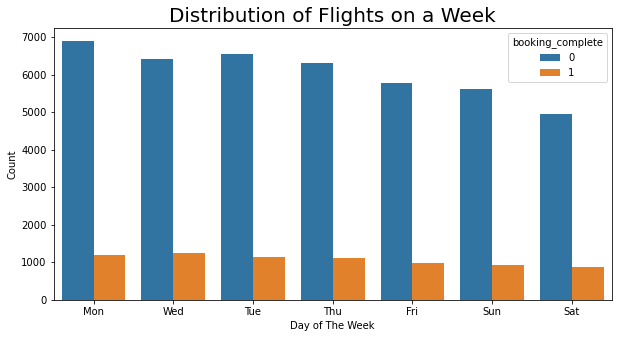

In [57]:
plt.figure(figsize=(10,5))
plots = sns.countplot(x="flight_day", hue="booking_complete" , data=df ,order=df.flight_day.value_counts().index)
plt.xlabel("Day of The Week",fontsize= 10)
plt.ylabel("Count", fontsize= 10)
plt.title("Distribution of Flights on a Week",fontsize=20)

Text(0.5, 1.0, 'Trip Type vs Bookings')

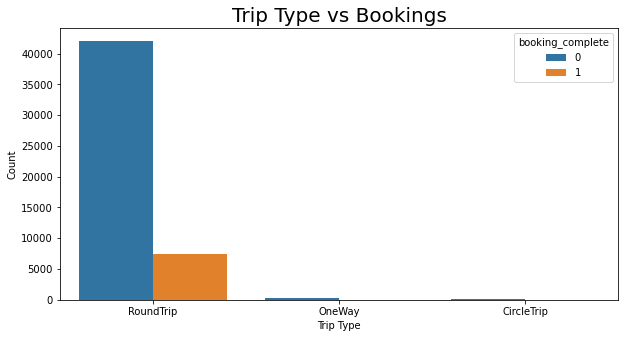

In [58]:
plt.figure(figsize=(10,5))
plots = sns.countplot(x="trip_type", hue="booking_complete" , data=df ,order=df.trip_type.value_counts().index)
plt.xlabel("Trip Type",fontsize= 10)
plt.ylabel("Count", fontsize= 10)
plt.title("Trip Type vs Bookings",fontsize=20)

Text(0.5, 1.0, 'Top 10 Countries Flight Bookings')

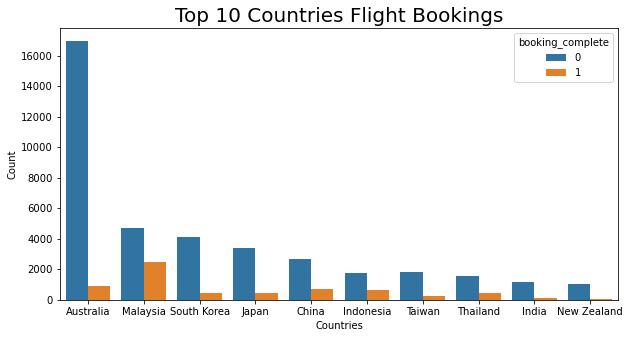

In [59]:
plt.figure(figsize=(10,5))
plots = sns.countplot(x="booking_origin", hue="booking_complete" , data=df ,order=df.booking_origin.value_counts().iloc[:10].index)
plt.xlabel("Countries",fontsize= 10)
plt.ylabel("Count", fontsize= 10)
plt.title("Top 10 Countries Flight Bookings",fontsize=20)

Text(0.5, 1.0, 'Top 10 Countries Flight Bookings')

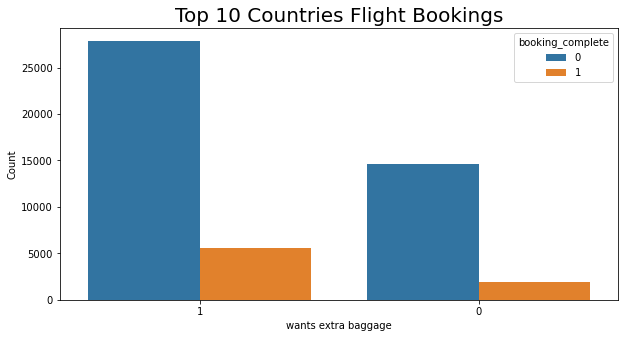

In [65]:
plt.figure(figsize=(10,5))
plots = sns.countplot(x="wants_extra_baggage", hue="booking_complete" , data=df ,order=df.wants_extra_baggage.value_counts().index)
plt.xlabel("wants extra baggage",fontsize= 10)
plt.ylabel("Count", fontsize= 10)
plt.title("Top 10 Countries Flight Bookings",fontsize=20)

Text(0.5, 1.0, 'Top 10 Countries Flight Bookings')

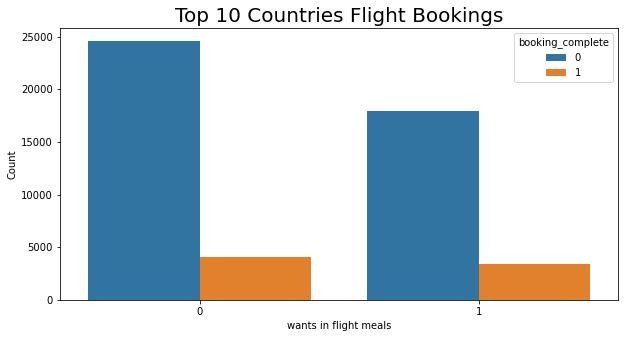

In [67]:
plt.figure(figsize=(10,5))
plots = sns.countplot(x="wants_in_flight_meals", hue="booking_complete" , data=df ,order=df.wants_in_flight_meals.value_counts().index)
plt.xlabel("wants in flight meals",fontsize= 10)
plt.ylabel("Count", fontsize= 10)
plt.title("Top 10 Countries Flight Bookings",fontsize=20)

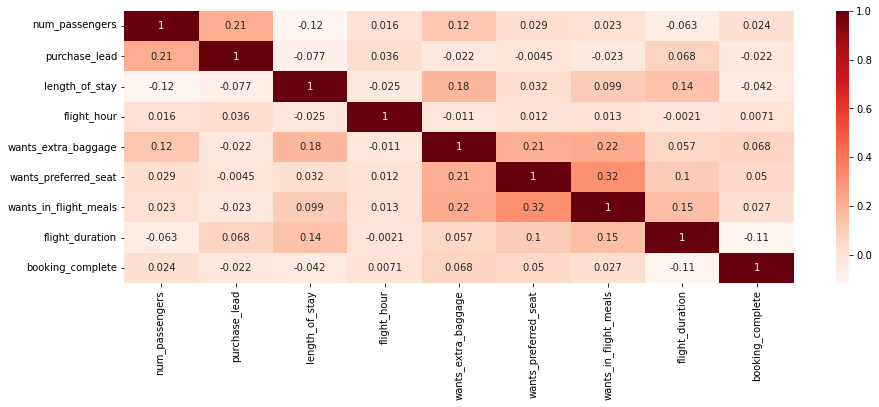

In [68]:
# Plotting heatmap 
plt.figure(figsize=(15,5))
sns.heatmap(df.corr() , annot=True, cmap="Reds")
plt.show()

## Predictive Modelling

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [35]:
x=df1.iloc[:,:-1]
y=df1.booking_complete

In [36]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = np.array(y)

In [37]:
# Splitting Train dataset into into 80:20 ratio
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.2)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [42]:
MAE_Rf = round(mean_absolute_error(y_pred,y_test)*100,2)
Accuracy_Rf=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy :",Accuracy_Rf)
print("Mean absolute error:",MAE_Rf)

Accuracy : 85.35
Mean absolute error: 14.65


In [85]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8507
           1       0.55      0.11      0.18      1493

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.55     10000
weighted avg       0.82      0.85      0.81     10000



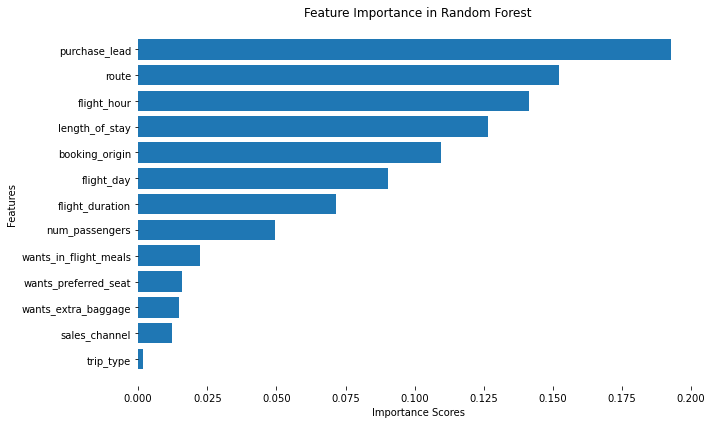

In [87]:
# Get feature importance scores
importance_scores = rf.feature_importances_

# Sort feature importance scores in descending order
sorted_indices = np.argsort(importance_scores)[::-1]
sorted_scores = importance_scores[sorted_indices]

# Get feature names
feature_names = x.columns.values

# Flip x and y columns
feature_names_flipped = np.flip(feature_names[sorted_indices])
sorted_scores_flipped = np.flip(sorted_scores)

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(range(len(importance_scores)), sorted_scores_flipped, tick_label=feature_names_flipped)

# Remove chart border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xlabel('Importance Scores')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.tight_layout()
plt.show()